In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
import math
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

In [2]:
df=pd.read_csv("/Users/irenewalken/Documents/GitHub/IH_RH_DA_FT_AUG_2022/Class_Materials/Case_Studies/Customer_Analysis_Case_Study/Data/Data_Marketing_Customer_Analysis_Round3.csv")

In [3]:
df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


# Activities List


**Tasks**

Hint: use the file Data_Marketing_Customer_Analysis_Round3.csv

* check if there are highly correlated features and drop them if there are any.
* One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 3. ( Hint: check Dropfirst option).
* for the first iteration, we will focus on the numericals data (numericals data frame) as our data source.

## Linear Regression

* X-y split (y is the target variable, which is the total claim amount)
* Train-test split.
* Standardize the data (after the data split).
* Apply linear regression.
* Model Interpretation.


## Model Validation

**Model Evaluation:**
* MSE.
* RMSE.
* MAE.
* R2.
* Adjusted R2.

**Feature Importance.**

* Model Iteration 

* Please rerun the model after adding the hot encoded categorical variables as well as other numeric categroical variables (e.g. number of open complaintes).
* (Optional) Please rerun the model after removing the outliers and compare the results using R2 metric.

In [4]:
numerical = df.select_dtypes(include=np.number, exclude=np.object)#get numerical data
numerical

/var/folders/dc/mkf8yrbx1ds4p7h5pty0xs600000gn/T/ipykernel_11154/3638983264.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  numerical = df.select_dtypes(include=np.number, exclude=np.object)#get numerical data


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [5]:
categoricals = df.select_dtypes(include=np.object, exclude=np.number) #get categorical data

/var/folders/dc/mkf8yrbx1ds4p7h5pty0xs600000gn/T/ipykernel_11154/557438992.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = df.select_dtypes(include=np.object, exclude=np.number) #get categorical data


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   effective_to_date              10689 non-null  object
 6   month                          10689 non-null  object
 7   employment_status              10689 non-null  object
 8   gender                         10689 non-null  object
 9   income                         10689 non-null  int64 
 10  location_code                  10689 non-null  object
 11  marital_status                 10689 non-null  object
 12  monthly_premium_auto           10689 non-null  int64 
 13  m

## check if there are highly correlated features and drop them if there are any.

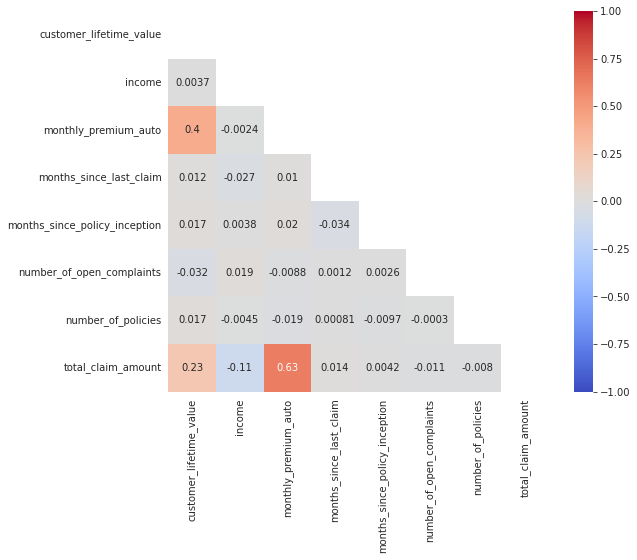

In [7]:
corr = numerical.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [8]:
#check if there are highly correlated features. Result - no, we don't have (0.63 is the biggest value)
corr_matrix=df.corr().abs()
upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
[column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]

[]

## Hot/Label Encoding .

In [9]:
categoricals['education'].unique()


array(['college', 'bachelor', 'high school or below', 'doctor', 'master'],
      dtype=object)

In [10]:
# label Encoding
categoricals["education"]= categoricals["education"].replace(["college","bachelor","high school or below", "doctor", "master"], [2,3,1,5,4])
categoricals["coverage"]= categoricals["coverage"].replace(["basic","extended","premium"], [1,2,3])
categoricals["renew_offer_type"]= categoricals["renew_offer_type"].replace(["offer1","offer2","offer3","offer4"], [1,2,3,4])

In [11]:
ordinal = categoricals[["education", "coverage","renew_offer_type"]]

In [12]:
ordinal

,education,coverage,renew_offer_type
0,2,1,3
1,2,1,4
2,3,1,3
3,2,2,2
4,3,3,1
...,...,...,...
10684,3,3,3
10685,2,1,2
10686,3,2,1
10687,2,3,1


In [13]:
nominal = categoricals[["region", "response","month","employment_status","gender","location_code","marital_status","policy_type","policy", "sales_channel","vehicle_class","vehicle_size"]]
nominal
#easier way how to delete columns: 
#nominal = categoricals
#nominal.drop(columns=["education", "coverage","renew_offer_type", "effective_to_date"], axis = 1, inplace = True)

,region,response,month,employment_status,gender,location_code,marital_status,policy_type,policy,sales_channel,vehicle_class,vehicle_size
0,central,no,feb,employed,m,suburban,married,corporate auto,corporate l3,agent,four-door car,medsize
1,west region,no,jan,unemployed,f,suburban,single,personal auto,personal l3,call center,four-door car,medsize
2,east,no,feb,employed,m,suburban,single,personal auto,personal l3,call center,suv,medsize
3,north west,yes,jan,employed,m,suburban,single,corporate auto,corporate l3,branch,four-door car,medsize
4,north west,no,jan,medical leave,f,suburban,married,personal auto,personal l2,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,jan,unemployed,f,suburban,married,personal auto,personal l1,web,luxury car,medsize
10685,north west,no,jan,employed,f,urban,married,personal auto,personal l3,branch,four-door car,medsize
10686,central,no,feb,employed,f,rural,married,corporate auto,corporate l3,web,luxury suv,medsize
10687,west region,no,feb,employed,f,urban,divorced,personal auto,personal l1,branch,suv,medsize


In [14]:
nominal_features=pd.get_dummies(nominal, drop_first=True) # One hot
nominal_features

,region_east,region_north west,region_west region,response_yes,month_jan,employment_status_employed,employment_status_medical leave,employment_status_retired,employment_status_unemployed,gender_m,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
3,0,1,0,1,1,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,1,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
10685,0,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
10686,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0


## X-y split (y is the target variable, which is the total_claim_amount)

In [15]:
X=numerical.drop('total_claim_amount', axis=1)
y=numerical.total_claim_amount

In [16]:
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,4809,48029,61,7,52,0,9
1,2228,92260,64,3,26,0,1
2,14947,22139,100,34,31,0,2
3,22332,49078,97,10,3,0,2
4,9025,23675,117,33,31,0,7
...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7
10685,5259,61146,65,7,68,0,6
10686,23893,39837,201,11,63,0,2
10687,11971,64195,158,0,27,4,6


In [17]:
X=X.drop('number_of_open_complaints', axis=1)
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies
0,4809,48029,61,7,52,9
1,2228,92260,64,3,26,1
2,14947,22139,100,34,31,2
3,22332,49078,97,10,3,2
4,9025,23675,117,33,31,7
...,...,...,...,...,...,...
10684,15563,61541,253,12,40,7
10685,5259,61146,65,7,68,6
10686,23893,39837,201,11,63,2
10687,11971,64195,158,0,27,6


## Data Splitting

In [18]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

## Standardize

In [19]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

In [20]:
X_train.shape

(7482, 6)

In [21]:
X_test_scaled=std_scaler.transform(X_test)

In [22]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-0.11021627 -1.27291744 -0.67143823  0.77999322  1.36516733 -0.40381143]
 [-0.42794064  0.74729478 -0.72925469 -0.90288055  1.68786198  0.84759702]
 [-0.5223013   0.26592193  0.48489091 -0.90288055  0.50464827 -0.82094758]
 ...
 [-0.81132612 -1.17224873 -0.90270406 -1.00187313 -1.39566466 -0.82094758]
 [ 2.25575772  0.98537142 -0.78707115  0.97797837 -1.61079442 -0.40381143]
 [ 1.18923585  0.68583346 -0.55580532  0.87898579  0.21780858 -0.40381143]]
--------
[[-0.40967729  1.58428551 -0.61362178  0.28503034  1.54444214  2.51614162]
 [-0.7597249  -0.93947257 -0.64253     1.47294124  0.755633   -0.82094758]
 [ 0.57248529 -1.23371005 -0.90270406 -1.496836    0.39708339 -0.40381143]
 ...
 [-0.79857077 -1.05867274 -0.58471355  0.87898579 -1.18053489 -0.82094758]
 [-0.42547654 -0.97370317 -0.81597938  0.58200807 -1.61079442  0.43046087]
 [-0.49881985 -0.95695203  0.71615674  1.76991896 -1.00126009 -0.82094758]]


## Apply Linear Regression

### Modeling using Statsmodels

In [23]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     866.8
Date:                Thu, 01 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:25:45   Log-Likelihood:                -51168.
No. Observations:                7482   AIC:                         1.024e+05
Df Residuals:                    7475   BIC:                         1.024e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        433.0597      2.612    165.776      0.0

In [24]:
predictions_test

array([261.36211959, 352.59009828, 298.28557351, ..., 368.29026143,
       316.48312353, 608.79238606])

In [25]:
#display adjusted R-squared
print(model.rsquared_adj)

0.4098094934485419


### Modeling using Scikit Learn

Model fitting

In [26]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

In [27]:
X_train

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies
6608,7271,20545,70,23,86,2
5697,5079,70474,68,6,95,5
10524,4428,58577,110,6,62,1
397,22332,49078,97,10,3,2
6324,2430,26182,70,29,30,1
...,...,...,...,...,...,...
9785,3086,73938,76,34,48,1
7763,5658,78834,72,14,20,8
5218,2434,23033,62,5,9,1
1346,23594,76358,66,25,3,2


In [28]:
model.coef_

array([ -6.66315266, -33.13187424, 187.82156671,   1.91008198,
        -0.91279703,  -2.31317812])

In [29]:
model.intercept_

433.0597433841219

In [30]:
#y= -6.66* customer_lifetime_value  --33.13 * income   +187.82 * monthly_premium_auto  +1.91 * months_since_last_claim  - 0.91*months_since_policy_inception - 2.31*number_of_policies + 433.06 

Making prediction

In [31]:
y_pred=model.predict(X_test_scaled)   # model prediction

y_pred_train=model.predict(X_train_scaled)

In [32]:
y_pred

array([261.36211959, 352.59009828, 298.28557351, ..., 368.29026143,
       316.48312353, 608.79238606])

In [33]:
y_test

4665     345
4072     345
4549     257
4211     445
3081     523
        ... 
3488     404
1667     554
1516     350
10215     27
2931     320
Name: total_claim_amount, Length: 3207, dtype: int64

## predicting on new data

In [34]:
## new record 
new_data=[8500,53000,66,20,31,3] # for example values
new_data_scaled=std_scaler.transform(np.array(new_data).reshape(-1,6))

/Users/irenewalken/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [35]:
np.array(np.array(new_data).reshape(-1,6)).shape

(1, 6)

In [36]:
model.predict(new_data_scaled)

array([284.88981042])

## Evaluating Model Performance

In [37]:
y_test

4665     345
4072     345
4549     257
4211     445
3081     523
        ... 
3488     404
1667     554
1516     350
10215     27
2931     320
Name: total_claim_amount, Length: 3207, dtype: int64

In [38]:
y_pred

array([261.36211959, 352.59009828, 298.28557351, ..., 368.29026143,
       316.48312353, 608.79238606])

In [39]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

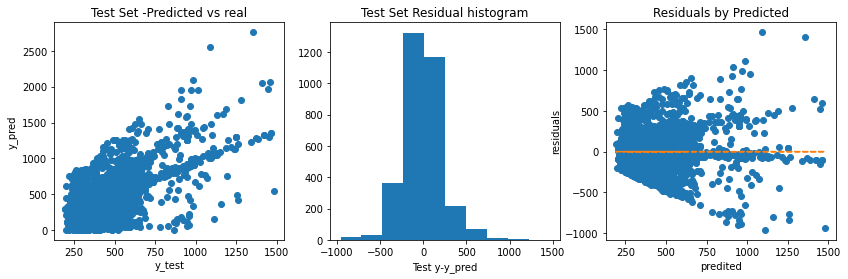

In [40]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")


ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

**Error metrics**

**MSE**

In [41]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

49403.17881141505
151.97245752690128


In [42]:
##prediction on the train set
mse(y_train,y_pred_train)

51010.87789203499

**RMSE**

In [43]:
rmse = math.sqrt(mse(y_train,y_pred_train))
rmse

225.85587858640073

**R2**

In [44]:
R2=r2_score(y_test,y_pred)
R2

0.40774244022467276

In [45]:
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)
R2_test

0.40774244022467276

**Adjusted R2**

In [46]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.40663195730009405

## getting the number of parameters

In [47]:
X_test.shape[1]

6

### Feature Importance

In [48]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [49]:
features_importances

,Attribute,Importance
2,monthly_premium_auto,187.821567
1,income,33.131874
0,customer_lifetime_value,6.663153
5,number_of_policies,2.313178
3,months_since_last_claim,1.910082
4,months_since_policy_inception,0.912797


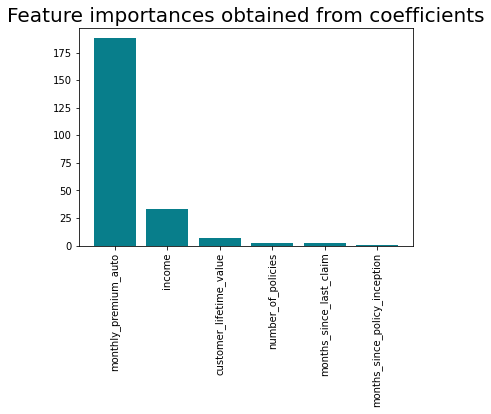

In [50]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [51]:
X_all = pd.concat([ordinal, nominal_features, numerical], axis=1)
X_all

,education,coverage,renew_offer_type,region_east,region_north west,region_west region,response_yes,month_jan,employment_status_employed,employment_status_medical leave,...,vehicle_size_medsize,vehicle_size_small,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2,1,3,0,0,0,0,0,1,0,...,1,0,4809,48029,61,7,52,0,9,292
1,2,1,4,0,0,1,0,1,0,0,...,1,0,2228,92260,64,3,26,0,1,744
2,3,1,3,1,0,0,0,0,1,0,...,1,0,14947,22139,100,34,31,0,2,480
3,2,2,2,0,1,0,1,1,1,0,...,1,0,22332,49078,97,10,3,0,2,484
4,3,3,1,0,1,0,0,1,0,1,...,1,0,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,3,3,3,0,0,0,0,1,0,0,...,1,0,15563,61541,253,12,40,0,7,1214
10685,2,1,2,0,1,0,0,1,1,0,...,1,0,5259,61146,65,7,68,0,6,273
10686,3,2,1,0,0,0,0,0,1,0,...,1,0,23893,39837,201,11,63,0,2,381
10687,2,3,1,0,0,1,0,0,1,0,...,1,0,11971,64195,158,0,27,4,6,618


In [52]:
X_all=X_all.drop('total_claim_amount', axis=1)
y_all=numerical.total_claim_amount
X_all

,education,coverage,renew_offer_type,region_east,region_north west,region_west region,response_yes,month_jan,employment_status_employed,employment_status_medical leave,...,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,2,1,3,0,0,0,0,0,1,0,...,0,1,0,4809,48029,61,7,52,0,9
1,2,1,4,0,0,1,0,1,0,0,...,0,1,0,2228,92260,64,3,26,0,1
2,3,1,3,1,0,0,0,0,1,0,...,0,1,0,14947,22139,100,34,31,0,2
3,2,2,2,0,1,0,1,1,1,0,...,0,1,0,22332,49078,97,10,3,0,2
4,3,3,1,0,1,0,0,1,0,1,...,0,1,0,9025,23675,117,33,31,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,3,3,3,0,0,0,0,1,0,0,...,0,1,0,15563,61541,253,12,40,0,7
10685,2,1,2,0,1,0,0,1,1,0,...,0,1,0,5259,61146,65,7,68,0,6
10686,3,2,1,0,0,0,0,0,1,0,...,0,1,0,23893,39837,201,11,63,0,2
10687,2,3,1,0,0,1,0,0,1,0,...,0,1,0,11971,64195,158,0,27,4,6


**Data Splitting_all**

In [53]:
X_all_train, X_all_test, y_all_train, y_all_test=train_test_split(X_all, y_all, test_size=.30,random_state=123)

<b> Standardize _all

In [54]:
std_scaler_all=StandardScaler().fit(X_all_train)   ##. finding the parameters ( mean, variance from the training set )

X_all_train_scaled=std_scaler_all.transform(X_all_train)

In [55]:
X_all_train.shape

(7482, 44)

In [56]:
X_all_test_scaled=std_scaler_all.transform(X_all_test)

In [57]:
print(X_all_train_scaled)
print("--------")
print(X_all_test_scaled)

[[-0.25803541 -0.73075717  1.00907882 ...  1.36516733 -0.42500069
  -0.40381143]
 [ 0.67463171 -0.73075717  0.01801453 ...  1.68786198 -0.42500069
   0.84759702]
 [-1.19070252 -0.73075717 -0.97304975 ...  0.50464827 -0.42500069
  -0.82094758]
 ...
 [ 0.67463171 -0.73075717  1.00907882 ... -1.39566466 -0.42500069
  -0.82094758]
 [ 0.67463171 -0.73075717  1.00907882 ... -1.61079442 -0.42500069
  -0.40381143]
 [-0.25803541 -0.73075717  0.01801453 ...  0.21780858  1.78399907
  -0.40381143]]
--------
[[-0.25803541 -0.73075717 -0.97304975 ...  1.54444214 -0.42500069
   2.51614162]
 [-0.25803541 -0.73075717 -0.97304975 ...  0.755633    0.67949919
  -0.82094758]
 [ 1.60729882 -0.73075717 -0.97304975 ...  0.39708339 -0.42500069
  -0.40381143]
 ...
 [-0.25803541 -0.73075717  0.01801453 ... -1.18053489 -0.42500069
  -0.82094758]
 [-0.25803541 -0.73075717  0.01801453 ... -1.61079442  0.67949919
   0.43046087]
 [-0.25803541  2.30002174  0.01801453 ... -1.00126009 -0.42500069
  -0.82094758]]


### Linear Regression_all

**Modeling using Statsmodels_all**

In [58]:
X_all_train_const_scaled = sm.add_constant(X_all_train_scaled) # adding a constant

model_all = sm.OLS(y_all_train, X_all_train_const_scaled).fit()
predictions_train_all = model_all.predict(X_all_train_const_scaled) 

X_all_test_const_scaled = sm.add_constant(X_all_test_scaled) # adding a constant
predictions_test_all = model_all.predict(X_all_test_const_scaled) 
print_model_all = model_all.summary()
print(print_model_all)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     593.3
Date:                Thu, 01 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:25:50   Log-Likelihood:                -47644.
No. Observations:                7482   AIC:                         9.537e+04
Df Residuals:                    7439   BIC:                         9.567e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        433.0597      1.635    264.868      0.0

In [59]:
predictions_test_all

array([462.39651952, 404.8125533 , 134.08036108, ..., 576.93081686,
       -21.83929724, 464.89515878])

In [60]:
#display adjusted R-squared
print(model_all.rsquared_adj)

0.7688051716648246


### Modeling using Scikit Learn_all

**Model fitting**

In [61]:
model_all=LinearRegression()    # model
model_all.fit(X_all_train_scaled, y_all_train)   # model train

LinearRegression()

In [62]:
X_all_train

,education,coverage,renew_offer_type,region_east,region_north west,region_west region,response_yes,month_jan,employment_status_employed,employment_status_medical leave,...,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
6608,2,1,3,0,1,0,0,1,0,0,...,1,1,0,7271,20545,70,23,86,0,2
5697,3,1,2,0,1,0,0,1,0,0,...,1,0,1,5079,70474,68,6,95,0,5
10524,1,1,1,0,1,0,1,1,1,0,...,0,1,0,4428,58577,110,6,62,0,1
397,2,2,2,0,0,1,1,1,1,0,...,1,0,1,22332,49078,97,10,3,0,2
6324,2,1,2,0,0,0,0,0,0,0,...,0,1,0,2430,26182,70,29,30,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9785,2,2,4,0,0,1,0,1,1,0,...,1,1,0,3086,73938,76,34,48,0,1
7763,1,1,2,0,1,0,0,1,1,0,...,1,0,1,5658,78834,72,14,20,2,8
5218,3,1,3,0,0,0,0,0,1,0,...,1,0,1,2434,23033,62,5,9,0,1
1346,3,1,3,0,0,0,1,1,1,0,...,0,1,0,23594,76358,66,25,3,0,2


In [63]:
X_all_train.columns

Index(['education', 'coverage', 'renew_offer_type', 'region_east',
       'region_north west', 'region_west region', 'response_yes', 'month_jan',
       'employment_status_employed', 'employment_status_medical leave',
       'employment_status_retired', 'employment_status_unemployed', 'gender_m',
       'location_code_suburban', 'location_code_urban',
       'marital_status_married', 'marital_status_single',
       'policy_type_personal auto', 'policy_type_special auto',
       'policy_corporate l2', 'policy_corporate l3', 'policy_personal l1',
       'policy_personal l2', 'policy_personal l3', 'policy_special l1',
       'policy_special l2', 'policy_special l3', 'sales_channel_branch',
       'sales_channel_call center', 'sales_channel_web',
       'vehicle_class_luxury car', 'vehicle_class_luxury suv',
       'vehicle_class_sports car', 'vehicle_class_suv',
       'vehicle_class_two-door car', 'vehicle_size_medsize',
       'vehicle_size_small', 'customer_lifetime_value', 'income',
 

In [64]:
model_all.coef_

array([-4.55989877e+00, -5.56754741e+00,  3.14918537e+00,  2.29417907e+00,
        2.22998279e-01,  2.23242791e+00, -8.23246124e+00, -7.63739342e-01,
       -1.14624934e+00,  4.39405212e+00,  2.98603838e-01,  3.89948052e+01,
        7.85893866e+00,  1.84131892e+02,  8.49067212e+01, -1.57416999e-01,
        3.08256697e+01,  3.35424218e+13, -1.32994889e+14, -2.10212399e+00,
       -8.48851567e-01, -2.63500063e+13, -3.22845389e+13, -3.72580103e+13,
        5.50792004e+13,  8.77986357e+13,  8.61360677e+13,  8.74311762e-01,
       -1.96964766e-01, -1.06804042e+00,  5.03719664e+00, -9.74315079e-01,
       -4.71510845e+00, -6.12540265e+00,  1.42347935e-01, -3.40929659e+00,
        2.75151166e-01, -2.15569837e-01, -4.95336023e+00,  1.79091930e+02,
        4.51614653e+00,  1.65592483e-01,  1.23702987e+00, -1.25213746e+00])

In [65]:
model_all.intercept_

433.06558756582825

**Making prediction**

In [66]:
y_all_pred=model_all.predict(X_all_test_scaled)   # model prediction

y_all_pred_train=model_all.predict(X_all_train_scaled)

In [67]:
y_all_pred

array([462.33854348, 404.72053282, 134.57170003, ..., 576.79218666,
       -21.72074153, 464.99562665])

In [68]:
y_all_test

4665     345
4072     345
4549     257
4211     445
3081     523
        ... 
3488     404
1667     554
1516     350
10215     27
2931     320
Name: total_claim_amount, Length: 3207, dtype: int64

## predicting on new data_all

In [69]:
## new record 
new_data_all=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,8500,53000,66,20,31,2,3]
new_data_all_scaled=std_scaler_all.transform(np.array(new_data_all).reshape(-1,44))

/Users/irenewalken/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [70]:
np.array(np.array(new_data_all).reshape(-1,44)).shape

(1, 44)

In [71]:
model_all.predict(new_data_all_scaled)

array([1.18518656e+15])

## Evaluating Model Performance

In [72]:
y_all_test

4665     345
4072     345
4549     257
4211     445
3081     523
        ... 
3488     404
1667     554
1516     350
10215     27
2931     320
Name: total_claim_amount, Length: 3207, dtype: int64

In [73]:
y_all_pred

array([462.33854348, 404.72053282, 134.57170003, ..., 576.79218666,
       -21.72074153, 464.99562665])

In [74]:
result_all=pd.DataFrame({"y_all_test":y_all_test,"y_all_pred":y_all_pred})

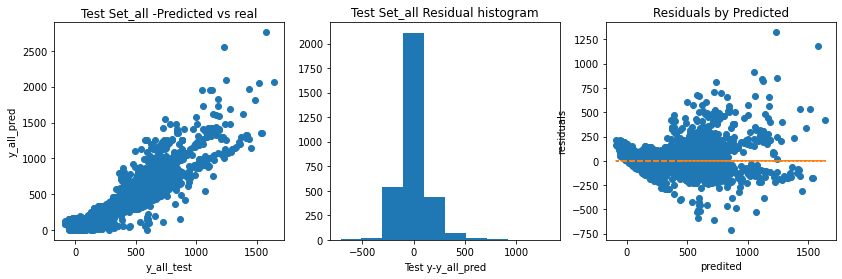

In [75]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_all_pred, y_all_test, 'o')
ax[0].set_xlabel("y_all_test")
ax[0].set_ylabel("y_all_pred")
ax[0].set_title("Test Set_all -Predicted vs real")


ax[1].hist(y_all_test - y_all_pred)
ax[1].set_xlabel("Test y-y_all_pred")
ax[1].set_title("Test Set_all Residual histogram")

ax[2].plot(y_all_pred,y_all_test - y_all_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_all_pred,np.zeros(len(y_all_pred)),linestyle='dashed')

**Error metrics**

**MSE**

In [76]:
print(mse(y_all_test,y_all_pred))
print(mae(y_all_test,y_all_pred))

19237.466684230563
96.1120054085748


In [77]:
mse(y_all_train,y_all_pred_train)

19886.227563070468

**RMSE**

In [78]:
rmse_all = math.sqrt(mse(y_all_train,y_all_pred_train))
rmse_all

141.01853623928474

**R2**

In [79]:
R2_all=r2_score(y_all_test,y_all_pred)
R2_all

0.7693764784214863

In [80]:
R2_all_test=model_all.score(X_all_test_scaled,y_all_test)
R2_all_train=model_all.score(X_all_train_scaled,y_all_train)
R2_all_test

0.7693764784214863

**Adjusted R2**

In [81]:
Adj_R2_all= 1 - (1-R2_all)*(len(y_all_test)-1)/(len(y_all_test)-X_all_test.shape[1]-1)
Adj_R2_all

0.7661672959580281

## getting the number of parameters 

In [82]:
X_all_test.shape[1]

44

### Feature Importance

In [83]:
features_importances_all = pd.DataFrame(data={
    'Attribute': X_all_train.columns,
    'Importance': abs(model_all.coef_)
})
features_importances_all = features_importances_all.sort_values(by='Importance', ascending=False)

In [84]:
features_importances_all

,Attribute,Importance
18,policy_type_special auto,1.329949e+14
25,policy_special l2,8.779864e+13
26,policy_special l3,8.613607e+13
24,policy_special l1,5.507920e+13
23,policy_personal l3,3.725801e+13
17,policy_type_personal auto,3.354242e+13
22,policy_personal l2,3.228454e+13
21,policy_personal l1,2.635001e+13
13,location_code_suburban,1.841319e+02
39,monthly_premium_auto,1.790919e+02


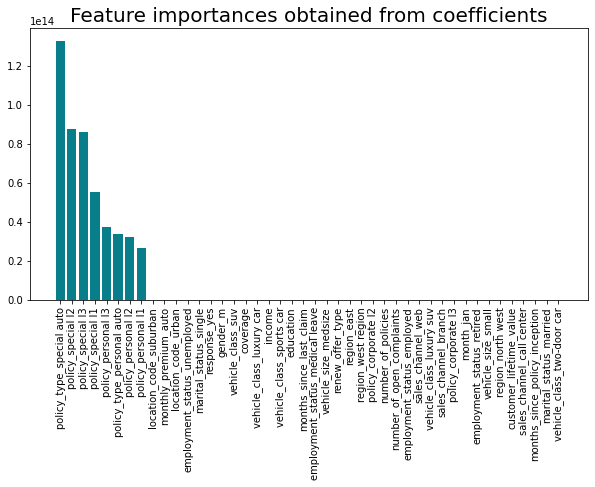

In [85]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.bar(x=features_importances_all['Attribute'], height=features_importances_all['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

**Removing the outliers**

/Users/irenewalken/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='customer_lifetime_value'>

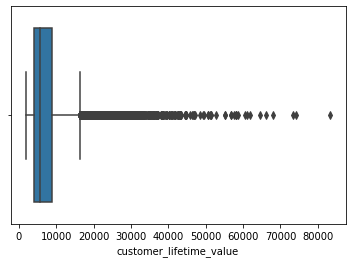

In [86]:
sns.boxplot(X_all['customer_lifetime_value'])

In [87]:
def outlier_removal(X, variable):
    upper_limit = X[variable].mean() + 3 * X[variable].std()
    lower_limit = X[variable].mean() - 3 * X[variable].std()
    return upper_limit, lower_limit
outlier_removal(X, "income")
outlier_removal(X, "monthly_premium_auto")
outlier_removal(X, "months_since_last_claim")
outlier_removal(X, "months_since_policy_inception")


(131.90347088850626, -35.70232952822933)

In [88]:
def without_outliers(X, variable):
    new_df = X[(X[variable] > lower_limit) & (X[variable] < upper_limit)]
    return new_df

In [89]:
without_outliers(X, "income")
without_outliers(X, "monthly_premium_auto")
without_outliers(X, "months_since_last_claim")
without_outliers(X, "months_since_policy_inception")

NameError: name 'lower_limit' is not defined

In [ ]:
sns.boxplot(new_df['customer_lifetime_value'])

In [ ]:
# def remove_outliers_from_series(series):
#     q1 = series.quantile(0.25)
#     q3 = series.quantile(0.75)
#     intraquartile_range = q3 - q1
#     fence_low  = q1 - 1.5 * intraquartile_range
#     fence_high = q3 + 1.5 * intraquartile_range
#     return series[(series > fence_low) & (series < fence_high)]

# remove_outliers_from_series(X)